In [333]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
results_folder = '../results'

In [389]:
logistic_res = pd.read_csv(f'{results_folder}/logistic_results_realdata.csv')
logistic_summary = logistic_res.pivot_table(values=['time', 'acc', 'logp'], 
                                            index='dset', columns='alg', aggfunc=['mean', 'sem'])

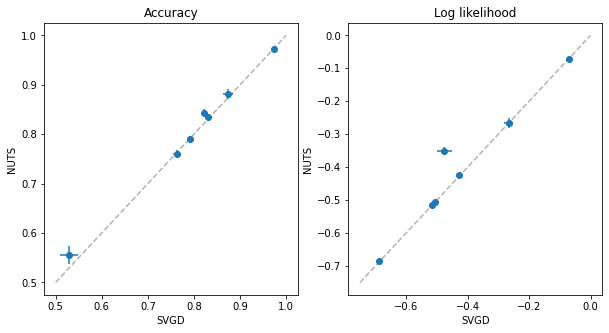

In [390]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(logistic_summary['mean']['acc']['svgd'], logistic_summary['mean']['acc']['nuts'], 
                xerr=logistic_summary['sem']['acc']['svgd'], yerr=logistic_summary['sem']['acc']['nuts'],
                fmt='o')
ax_acc.plot([0.5, 1.], [0.5, 1.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD')
ax_acc.set_ylabel('NUTS')
ax_acc.set_title('Accuracy')

ax_logp.errorbar(logistic_summary['mean']['logp']['svgd'], logistic_summary['mean']['logp']['nuts'], 
                 xerr=logistic_summary['sem']['logp']['svgd'], yerr=logistic_summary['sem']['logp']['nuts'],
                 fmt='o')
ax_logp.plot([-0.75, 0.], [-0.75, 0.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD')
ax_logp.set_ylabel('NUTS')
ax_logp.set_title('Log likelihood')

fig.savefig('./logistic_svgd_nuts')

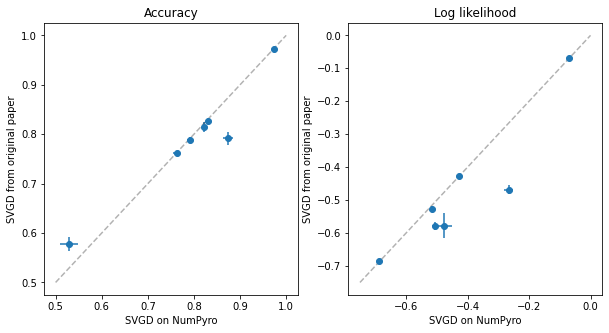

In [391]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(logistic_summary['mean']['acc']['svgd'], logistic_summary['mean']['acc']['svgd_orig'], 
                xerr=logistic_summary['sem']['acc']['svgd'], yerr=logistic_summary['sem']['acc']['svgd_orig'],
                fmt='o')
ax_acc.plot([0.5, 1.], [0.5, 1.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD on NumPyro')
ax_acc.set_ylabel('SVGD from original paper')
ax_acc.set_title('Accuracy')

ax_logp.errorbar(logistic_summary['mean']['logp']['svgd'], logistic_summary['mean']['logp']['svgd_orig'], 
                 xerr=logistic_summary['sem']['logp']['svgd'], yerr=logistic_summary['sem']['logp']['svgd_orig'],
                 fmt='o')
ax_logp.plot([-0.75, 0.], [-0.75, 0.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD on NumPyro')
ax_logp.set_ylabel('SVGD from original paper')
ax_logp.set_title('Log likelihood')

fig.savefig('./logistic_svgd_variants')

In [392]:
columns = [
    ('acc',       'nuts'),
    ('acc',       'svgd'),
    ('acc',  'svgd_orig'),
    ('logp',      'nuts'),
    ('logp',      'svgd'),
    ('logp', 'svgd_orig'),
]

f = lambda x: f'{x:.3f}'
result_table_logist = logistic_summary['mean'].applymap(f) + " \pm " + logistic_summary['sem'].applymap(f)
result_table_logist = result_table_logist[columns]
result_table_logist

acc                                                logp  \
alg                  nuts             svgd        svgd_orig              nuts   
dset                                                                            
banana    0.555 \pm 0.019  0.528 \pm 0.020  0.577 \pm 0.014  -0.686 \pm 0.004   
image     0.834 \pm 0.004  0.830 \pm 0.003  0.828 \pm 0.004  -0.425 \pm 0.005   
ringnorm  0.759 \pm 0.008  0.762 \pm 0.007  0.762 \pm 0.004  -0.514 \pm 0.008   
splice    0.843 \pm 0.007  0.823 \pm 0.006  0.814 \pm 0.010  -0.351 \pm 0.011   
titanic   0.791 \pm 0.006  0.791 \pm 0.006  0.788 \pm 0.006  -0.505 \pm 0.009   
twonorm   0.973 \pm 0.001  0.973 \pm 0.001  0.973 \pm 0.003  -0.070 \pm 0.003   
waveform  0.881 \pm 0.010  0.874 \pm 0.010  0.792 \pm 0.013  -0.265 \pm 0.015   

                                              
alg                   svgd         svgd_orig  
dset                                          
banana    -0.689 \pm 0.005  -0.686 \pm 0.001  
image     -0.426 \pm 0.006  -0.427 \pm 0.007  
ringnorm  -0.514 \pm 0.008  -0.526 \pm 0.008  
splice    -0.476 \pm 0.025  -0.578 \pm 0.039  
titanic   -0.505 \pm 0.010  -0.579 \pm 0.012  
twonorm   -0.070 \pm 0.003  -0.068 \pm 0.005  
waveform  -0.266 \pm 0.014  -0.468 \pm 0.015

In [354]:
print(result_table_logist.style.to_latex())

\begin{tabular}{lllllll}
 & \multicolumn{3}{r}{acc} & \multicolumn{3}{r}{logp} \\
alg & nuts & svgd & svgd_orig & nuts & svgd & svgd_orig \\
dset &  &  &  &  &  &  \\
banana & 0.508 \pm 0.002 & 0.507 \pm 0.002 & 0.502 \pm 0.001 & -0.686 \pm 0.004 & -0.688 \pm 0.004 & -0.691 \pm 0.002 \\
image & 0.731 \pm 0.001 & 0.732 \pm 0.002 & 0.615 \pm 0.005 & -0.425 \pm 0.005 & -0.432 \pm 0.007 & -0.521 \pm 0.006 \\
ringnorm & 0.665 \pm 0.003 & 0.666 \pm 0.003 & 0.576 \pm 0.003 & -0.514 \pm 0.008 & -0.511 \pm 0.008 & -0.582 \pm 0.005 \\
splice & 0.777 \pm 0.004 & 0.659 \pm 0.004 & 0.548 \pm 0.026 & -0.351 \pm 0.011 & -0.518 \pm 0.008 & -1.374 \pm 0.307 \\
titanic & 0.666 \pm 0.003 & 0.671 \pm 0.004 & 0.551 \pm 0.002 & -0.505 \pm 0.009 & -0.504 \pm 0.010 & -0.614 \pm 0.004 \\
twonorm & 0.962 \pm 0.001 & 0.961 \pm 0.001 & 0.691 \pm 0.011 & -0.070 \pm 0.003 & -0.071 \pm 0.003 & -0.382 \pm 0.016 \\
waveform & 0.830 \pm 0.005 & 0.812 \pm 0.005 & 0.578 \pm 0.014 & -0.265 \pm 0.015 & -0.287 \pm 0.013 & -

In [355]:
dim_res = pd.read_csv(f'{results_folder}/logistic_results_dims.csv').replace([np.inf, -np.inf], np.nan).dropna()
dim_summary = dim_res.pivot_table(values=['time', 'abs_acc', 'logp'], index='dim', columns='alg', aggfunc=['mean', 'sem'])

In [356]:
dim_summary

mean                                                         sem  \
    abs_acc                logp                time             abs_acc   
alg    nuts      svgd      nuts      svgd      nuts      svgd      nuts   
dim                                                                       
2    0.8600  0.860400 -0.333887 -0.333115  1.364537  3.412190  0.005967   
4    0.8372  0.829200 -0.375565 -0.385145  1.350947  3.027307  0.011689   
8    0.8544  0.852000 -0.345297 -0.344729  1.432251  2.928220  0.007467   
16   0.8420  0.841600 -0.355887 -0.354431  1.573804  3.324078  0.008390   
32   0.8364  0.834000 -0.369954 -0.393643  1.607253  3.581892  0.004792   
64   0.8260  0.818400 -0.394344 -0.483475  1.836130  4.422262  0.005831   
128  0.8176  0.795333 -0.412838 -0.635878  1.868507  5.331318  0.006823   
256  0.7736  0.756667 -0.468243 -0.963431  2.482411  5.114456  0.010225   

                                                       
                   logp                time            
alg      svgd      nuts      svgd      nuts      svgd  
dim                                                    
2    0.007332  0.013765  0.013871  0.047857  0.798665  
4    0.011876  0.019789  0.020838  0.028500  0.227945  
8    0.007563  0.012287  0.010838  0.047835  0.242871  
16   0.007960  0.013262  0.013306  0.038549  0.312436  
32   0.003578  0.006770  0.008247  0.046255  0.308406  
64   0.011071  0.010767  0.015676  0.054199  0.413753  
128  0.019055  0.006345  0.060578  0.036379  0.622841  
256  0.014252  0.011488  0.102887  0.095426  0.064754

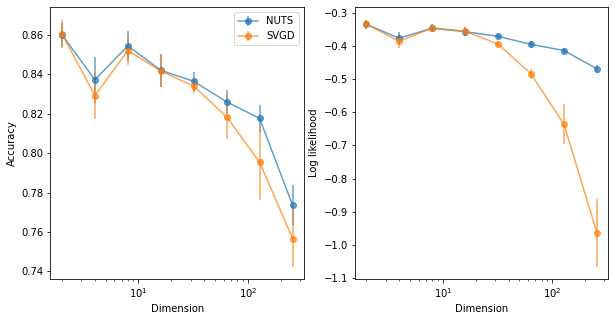

In [373]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(dim_summary.index, dim_summary['mean']['abs_acc']['nuts'], yerr=dim_summary['sem']['abs_acc']['nuts'], fmt='o-', label='NUTS', alpha=0.7)
ax_acc.errorbar(dim_summary.index, dim_summary['mean']['abs_acc']['svgd'], yerr=dim_summary['sem']['abs_acc']['svgd'], fmt='o-', label='SVGD', alpha=0.7)
ax_acc.set_xlabel('Dimension')
ax_acc.set_ylabel('Accuracy')
ax_acc.set_xscale('log')
ax_acc.legend()

ax_logp.errorbar(dim_summary.index, dim_summary['mean']['logp']['nuts'], yerr=dim_summary['sem']['logp']['nuts'], fmt='o-', label='NUTS', alpha=0.7)
ax_logp.errorbar(dim_summary.index, dim_summary['mean']['logp']['svgd'], yerr=dim_summary['sem']['logp']['svgd'], fmt='o-', label='SVGD', alpha=0.7)
ax_logp.set_xlabel('Dimension')
ax_logp.set_ylabel('Log likelihood')
ax_logp.set_xscale('log')

fig.savefig('./logistic_dim')

In [358]:
bnn_res = pd.read_csv(f'{results_folder}/bnn_results_uci.csv')
bnn_summary = bnn_res.pivot_table(values=['time', 'rmse', 'logp'], index='dset', columns='alg', aggfunc=['mean', 'sem'])

Text(0.5, 1.0, 'Log likelihood')

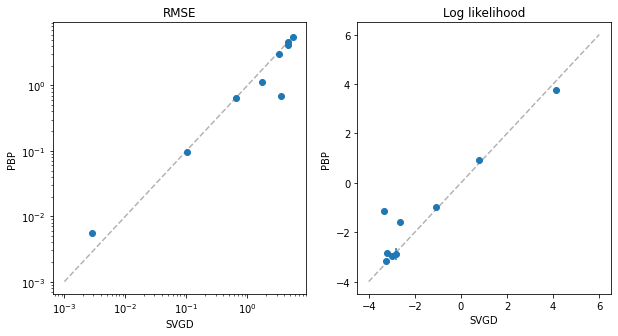

In [359]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(bnn_summary['mean']['rmse']['svgd'], bnn_summary['mean']['rmse']['pbp'], 
                xerr=bnn_summary['sem']['rmse']['svgd'], yerr=bnn_summary['sem']['rmse']['pbp'],
                fmt='o')
ax_acc.plot([1e-3, 6.], [1e-3, 6.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD')
ax_acc.set_ylabel('PBP')
ax_acc.set_title('RMSE')
ax_acc.set_xscale('log')
ax_acc.set_yscale('log')

ax_logp.errorbar(bnn_summary['mean']['logp']['svgd'], bnn_summary['mean']['logp']['pbp'], 
                xerr=bnn_summary['sem']['logp']['svgd'], yerr=bnn_summary['sem']['logp']['pbp'],
                fmt='o')
ax_logp.plot([-4., 6.], [-4., 6.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD')
ax_logp.set_ylabel('PBP')
ax_logp.set_title('Log likelihood')

Text(0.5, 1.0, 'Log likelihood')

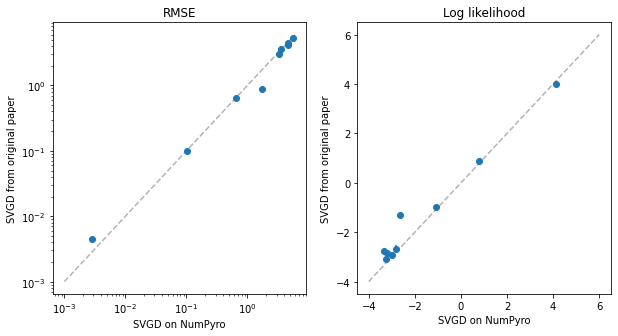

In [360]:
fig, [ax_acc, ax_logp] = plt.subplots(ncols=2, figsize=(10, 5))

ax_acc.errorbar(bnn_summary['mean']['rmse']['svgd'], bnn_summary['mean']['rmse']['svgd_orig'], 
                xerr=bnn_summary['sem']['rmse']['svgd'], yerr=bnn_summary['sem']['rmse']['svgd_orig'],
                fmt='o')
ax_acc.plot([1e-3, 6.], [1e-3, 6.], '--k', alpha=0.3)
ax_acc.set_xlabel('SVGD on NumPyro')
ax_acc.set_ylabel('SVGD from original paper')
ax_acc.set_title('RMSE')
# ax_acc.get_legend().remove()
ax_acc.set_xscale('log')
ax_acc.set_yscale('log')

ax_logp.errorbar(bnn_summary['mean']['logp']['svgd'], bnn_summary['mean']['logp']['svgd_orig'], 
                xerr=bnn_summary['sem']['logp']['svgd'], yerr=bnn_summary['sem']['logp']['svgd_orig'],
                fmt='o')
ax_logp.plot([-4., 6.], [-4., 6.], '--k', alpha=0.3)
ax_logp.set_xlabel('SVGD on NumPyro')
ax_logp.set_ylabel('SVGD from original paper')
ax_logp.set_title('Log likelihood')

In [361]:
columns = [
    ('rmse',       'pbp'),
    ('rmse',      'svgd_orig'),
    ('rmse', 'svgd'),
]

f = lambda x: f'{x:.3f}'
result_table = "$" + bnn_summary['mean'].applymap(f) + " \pm " + bnn_summary['sem'].applymap(f) + "$"
result_table = result_table[columns]
result_table

rmse                                      
alg                     pbp          svgd_orig               svgd
dset                                                             
boston    $3.007 \pm 0.278$  $2.987 \pm 0.341$  $3.290 \pm 0.369$
concrete  $5.435 \pm 0.075$  $5.240 \pm 0.134$  $5.567 \pm 0.158$
energy    $1.147 \pm 0.046$  $0.890 \pm 0.032$  $1.706 \pm 0.051$
kin8nm    $0.097 \pm 0.001$  $0.101 \pm 0.001$  $0.100 \pm 0.001$
naval     $0.006 \pm 0.000$  $0.004 \pm 0.000$  $0.003 \pm 0.000$
power     $4.132 \pm 0.046$  $4.168 \pm 0.053$  $4.627 \pm 0.055$
protein   $4.668 \pm 0.009$  $4.493 \pm 0.018$  $4.655 \pm 0.014$
wine      $0.638 \pm 0.014$  $0.632 \pm 0.015$  $0.651 \pm 0.014$
yacht     $0.689 \pm 0.047$  $3.656 \pm 0.282$  $3.546 \pm 0.195$

In [362]:
print(result_table.style.to_latex())

\begin{tabular}{llll}
 & \multicolumn{3}{r}{rmse} \\
alg & pbp & svgd_orig & svgd \\
dset &  &  &  \\
boston & $3.007 \pm 0.278$ & $2.987 \pm 0.341$ & $3.290 \pm 0.369$ \\
concrete & $5.435 \pm 0.075$ & $5.240 \pm 0.134$ & $5.567 \pm 0.158$ \\
energy & $1.147 \pm 0.046$ & $0.890 \pm 0.032$ & $1.706 \pm 0.051$ \\
kin8nm & $0.097 \pm 0.001$ & $0.101 \pm 0.001$ & $0.100 \pm 0.001$ \\
naval & $0.006 \pm 0.000$ & $0.004 \pm 0.000$ & $0.003 \pm 0.000$ \\
power & $4.132 \pm 0.046$ & $4.168 \pm 0.053$ & $4.627 \pm 0.055$ \\
protein & $4.668 \pm 0.009$ & $4.493 \pm 0.018$ & $4.655 \pm 0.014$ \\
wine & $0.638 \pm 0.014$ & $0.632 \pm 0.015$ & $0.651 \pm 0.014$ \\
yacht & $0.689 \pm 0.047$ & $3.656 \pm 0.282$ & $3.546 \pm 0.195$ \\
\end{tabular}



In [363]:
columns = [
    ('logp',       'pbp'),
    ('logp',      'svgd_orig'),
    ('logp', 'svgd'),  
]

f = lambda x: f'{x:.3f}'
result_table = "$" + bnn_summary['mean'].applymap(f) + " \pm " + bnn_summary['sem'].applymap(f) + "$"
result_table = result_table[columns]
result_table

logp                                        
alg                      pbp           svgd_orig                svgd
dset                                                                
boston    $-2.879 \pm 0.261$  $-2.689 \pm 0.158$  $-2.809 \pm 0.043$
concrete  $-3.150 \pm 0.022$  $-3.099 \pm 0.032$  $-3.249 \pm 0.014$
energy    $-1.583 \pm 0.033$  $-1.309 \pm 0.036$  $-2.654 \pm 0.004$
kin8nm     $0.913 \pm 0.011$   $0.871 \pm 0.009$   $0.793 \pm 0.004$
naval      $3.766 \pm 0.009$   $3.993 \pm 0.022$   $4.125 \pm 0.003$
power     $-2.839 \pm 0.011$  $-2.850 \pm 0.014$  $-3.219 \pm 0.005$
protein   $-2.960 \pm 0.002$  $-2.923 \pm 0.005$  $-2.995 \pm 0.005$
wine      $-0.986 \pm 0.028$  $-0.968 \pm 0.021$  $-1.074 \pm 0.033$
yacht     $-1.129 \pm 0.038$  $-2.741 \pm 0.065$  $-3.350 \pm 0.004$

In [364]:
print(result_table.style.to_latex())

\begin{tabular}{llll}
 & \multicolumn{3}{r}{logp} \\
alg & pbp & svgd_orig & svgd \\
dset &  &  &  \\
boston & $-2.879 \pm 0.261$ & $-2.689 \pm 0.158$ & $-2.809 \pm 0.043$ \\
concrete & $-3.150 \pm 0.022$ & $-3.099 \pm 0.032$ & $-3.249 \pm 0.014$ \\
energy & $-1.583 \pm 0.033$ & $-1.309 \pm 0.036$ & $-2.654 \pm 0.004$ \\
kin8nm & $0.913 \pm 0.011$ & $0.871 \pm 0.009$ & $0.793 \pm 0.004$ \\
naval & $3.766 \pm 0.009$ & $3.993 \pm 0.022$ & $4.125 \pm 0.003$ \\
power & $-2.839 \pm 0.011$ & $-2.850 \pm 0.014$ & $-3.219 \pm 0.005$ \\
protein & $-2.960 \pm 0.002$ & $-2.923 \pm 0.005$ & $-2.995 \pm 0.005$ \\
wine & $-0.986 \pm 0.028$ & $-0.968 \pm 0.021$ & $-1.074 \pm 0.033$ \\
yacht & $-1.129 \pm 0.038$ & $-2.741 \pm 0.065$ & $-3.350 \pm 0.004$ \\
\end{tabular}



In [365]:
bb_epochs = pd.read_csv(f'{results_folder}/bnn_results_epochs.csv')
bb_epochs_results = bb_epochs.pivot_table(values=['RMSE', 'Log likelihood'], 
                                          index=['Epoch'], columns=['Dataset', 'Algorithm'])

In [366]:
dsets_in_epoch = {x[1] for x in bb_epochs_results.columns}
dsets_in_epoch = sorted(dsets_in_epoch)

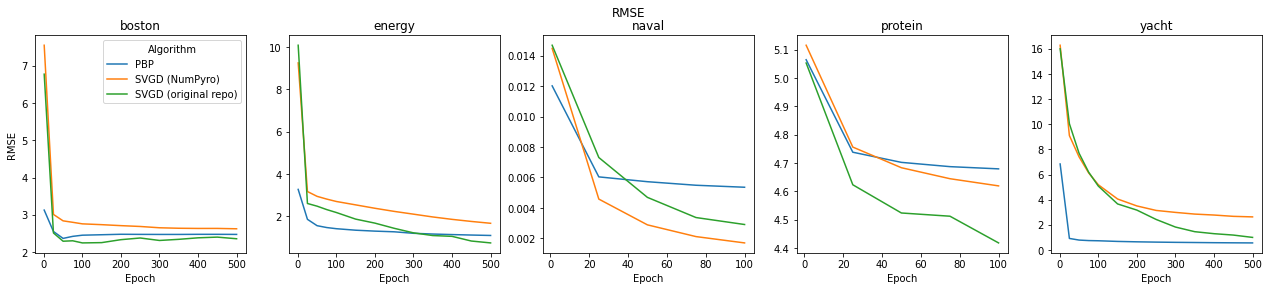

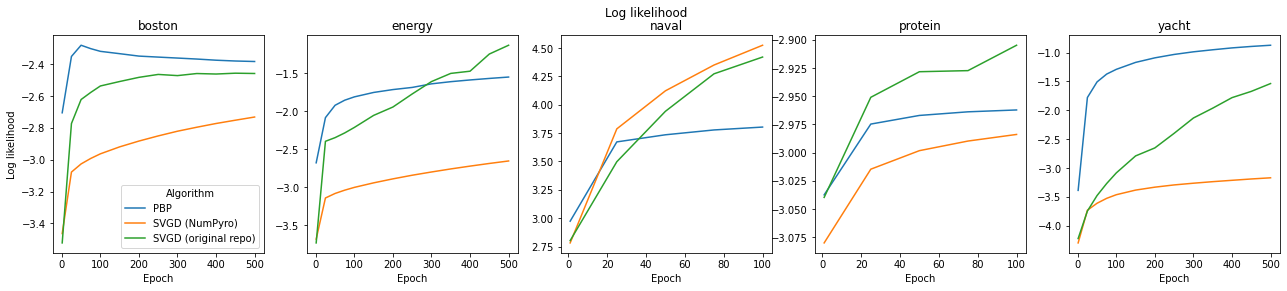

In [367]:
for val in ['RMSE', "Log likelihood"]:
    fig, axs = plt.subplots(ncols=len(dsets_in_epoch), figsize=(22, 4))
    for i, (dset, ax) in enumerate(zip(dsets_in_epoch, axs)):
        bb_epochs_results[val, dset].plot(ax=ax)
        ax.set_title(dset)
        fig.suptitle(val)
        if i:
            ax.get_legend().remove()
        else:
            ax.set_ylabel(val)
    fig.savefig(f'./bayesian_epoch_{val.replace(" ", "")}')